# Task-1: Prediction Using Supervised Machine Learning

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data from csv file using pd.read_csv

In [2]:
data = pd.read_csv('marks_data.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking whether there are any null values

In [3]:
data.isnull().any() #As there are no null values we can proceed further

Hours     False
Scores    False
dtype: bool

# To view some basic statistical details

In [4]:
data.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

# BOX PLOT for checking outliers

In [6]:
import seaborn as sns

C:\Users\Sumanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

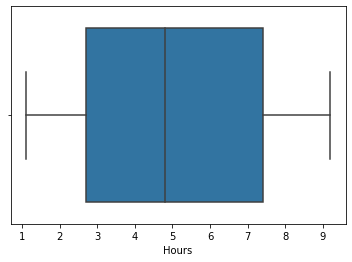

In [7]:
sns.boxplot(data['Hours']) #No outliers detected

C:\Users\Sumanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

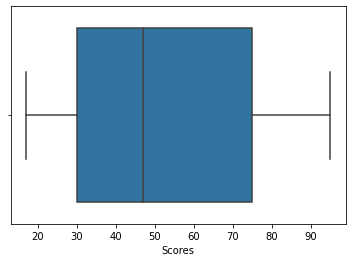

In [8]:
sns.boxplot(data['Scores'])#No outliers detected

## Running a scatter plot to understand distribution of data

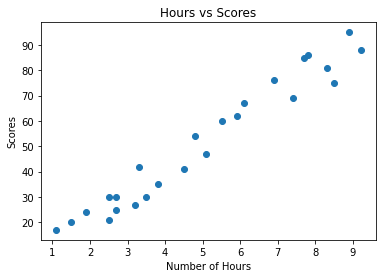

In [9]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

### OBSERVATION: We can clearly notice that Number of Hours studied is linearly related to the Scores of the student.

# Seperating Independent and Dependent Variables

In [10]:
#Hours is independent variable as it doesnot depend on any other variable and it is the input
x=data.iloc[:,0:1].values 
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
    #Scores is dependent variable as it depends on Hours variable and it is the output
y=data.iloc[:,-1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Splitting the data into for training and testing data using train_test_split

In [12]:
from sklearn.model_selection import train_test_split

# Taking 80% data for training and 20% for testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [14]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [15]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [16]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [17]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

## Training the data using Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(X_train, y_train) #fitting training data input and output to model i.e X_train and y_train 

LinearRegression()

## Comparing Actual and Predicted Values

In [21]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':y_pred})
pred_compare

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating the Model

In [23]:
from sklearn import metrics

In [24]:
from sklearn.metrics import r2_score #Checking accuracy using r2_score
r2_score(y_test,y_pred) 

0.9454906892105356

##  Accuracy is 94.5%

# Calculating error using Mean Absolute Error

In [25]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.183859899002975


### What will be predicted score if a student study for 9.25 hrs in a day?

In [26]:
p=model.predict([[9.25]])
print("Predicted Score is",p)

Predicted Score is [93.69173249]


### Conclusion: After understanding the dataset, a Linear regression model was implemented and marks for a student who studies for 9.25 hours was also predicted which was approximately 94.

## Thank you
 